In [1]:
import requests
import bs4
from PIL import Image
from io import BytesIO
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
                                                  #  '''  do not forget =    it's (HEIGHT, WIDTH)    ''' 
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(linewidth = 120)
torch.set_grad_enabled(True)



###################################################################################################################
###################################################################################################################




def some_scrapy_boi():
    
    print ("scraping initiated")


    def url_chugger(keyword, code):  # search and download images 

        generated_url = "https://www.google.com/search?um=1&hl=en&safe=active&nfpr=1&q="+ keyword + "&start=30&tbm=isch"

        raw = requests.get(generated_url)

        soup = bs4.BeautifulSoup(raw.text, "html5")# convert to beautifulsoup class
        woop = soup.select('img')
        image_tags = soup.findAll("img")
        url_arr = []
        for image_tag in image_tags:
            url_arr.append(image_tag['src'])  

        def chunk_save(url_arr):

            for i in range (len(url_arr)):

                fmt_name = code + "/" + keyword  + "__"+ str(i+1)+".png"

                response = requests.get(url_arr[i])
                img = Image.open(BytesIO(response.content))


                img.save(fmt_name)
                print ("saved  - ", fmt_name)

        chunk_save(url_arr)

        print ( code, "  --saved ")


    def search_n_scrape():
        foo = input ("Enter first  keyword   : ")   # search initiator
        doo = input("Enter second keyword     :")   
        
        print (" Alpha is - ", foo)
        
        print ("")
        
        print ("Beta is -", doo)
        
        print ("")
        
    
                                                    
            
# Thanks to @Vchrombie for telling me to use "search" instead of just shoving in copied URLS
        
        url_chugger(foo, "alpha")
        url_chugger(doo, "beta")
        
    search_n_scrape()
        
        
###################################################################################################################
###################################################################################################################


def img_processor(): 
    
    print ("processing images now ...")
    
    def load_images_from_folder(folder):
        images = []
        for filename in os.listdir(folder):
            path = folder +"/"+ filename

            im = Image.open(path)

            im = im.convert('L')
            
            # grayscale because sneakyboi was born colorblind

            images.append(im)
        return images


    def convert_to_numpy(arr, vector):
        np_arr = []
        for p in range (len(arr)):
            mario =  [np.array(arr[p]), vector]
            np_arr.append(mario)
        return np_arr

    def normalise(arr, width, height):  ## resize and standardise
        arr_copy = arr
        for p in range (len(arr)):
            doofus = arr[p]
            doofus = doofus.resize((width, height), Image.ANTIALIAS)
            arr_copy[p]= doofus
        return arr_copy


    def save(arr, name):
        fmt_name  = "numpy/" + name   # numpy array saver
        np.save(fmt_name, arr)

        print ("saved -- ", fmt_name)

    def cvt_raw_data():

        alpha_arr = load_images_from_folder("alpha")
        beta_arr = load_images_from_folder("beta")


        alpha_norm = normalise(alpha_arr , 100, 100)
        beta_norm = normalise(beta_arr , 100, 100)


        alpha_final = convert_to_numpy(alpha_norm, [0,1])
        beta_final = convert_to_numpy(beta_norm, [1,0])


        save(alpha_final, "alpha_final")
        save(beta_final, "beta_final")
        
    cvt_raw_data()
        
        

        
def finalise_data():
    
    print ("preparing training data ...")
    def get_binary_data(arr):
        foo = arr
        for i in range (len(arr)):
            if foo[i][1] == [1,0]:
                foo[i][1] = [1]

            else:
                foo[i][1] = [0]

        return foo


    def preprocess( arr1, arr2 ):

        alpha = np.array(np.load(arr1))
        beta = np.array(np.load(arr2))

        gamma = np.concatenate((alpha, beta), axis = 0)  # concatenates - as the word is sugesting 
        gamma = get_binary_data(gamma)

        np.random.shuffle(gamma)

        np.save ("numpy/binary_shuffled.npy", gamma)
        print ("final array has been saved as --   binary_shuffled.npy  - in folder -- numpy" )


    preprocess("numpy/alpha_final.npy", "numpy/beta_final.npy")
        
  




###################################################################################################################
###################################################################################################################







foo = np.array(np.load("numpy/binary_shuffled.npy"))
        
peanut = foo    
        
def chug_to_tensor(images,labels):
    images = torch.from_numpy(images)
    labels = torch.tensor(labels)
    images = images.unsqueeze(0)
    images = images.unsqueeze(0)
 
    images = images.type(torch.float32)

    return (images,labels)
        
        
        
        
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        
        # in_channels = 1, out_channels = 10 kernel_size = 5 (kernel is the filter thingy )
        
        self.pool = nn.MaxPool2d(3, 3)
        
        self.conv2 = nn.Conv2d(10, 20, 5)
        
        self.fc1 = nn.Linear(1620, 125)       # linear starts 
        self.fc2 = nn.Linear(125, 80)
        self.fc3 = nn.Linear(80, 2)   ## op

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1620)                   # reshape thingy
        x = F.relu(self.fc1(x))  
        
## DO NOT USE SOFTMAX AND CROSSENTROPY TOGETHER, USE relu FOR CrossEntropyLoss

        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

sneakernet = Net()






###################################################################################################################
###################################################################################################################




def train_loop(epochs):
    
    foo = np.array(np.load("numpy/binary_shuffled.npy"))
        
    peanut = foo
    
        
        
    
    optimizer = optim.Adam(sneakernet.parameters(), lr = 0.001)
    
    for m in range (epochs):


        epoch_loss = 0

        single_batch = next(iter(peanut))

        for single_batch in peanut:

            image, label = single_batch
            optimizer.zero_grad()

            image,label = chug_to_tensor(image, label)

            pred = sneakernet(image).squeeze(1)

            loss = F.cross_entropy(pred,label)    # pain to fix if messed up

            loss.backward()   #backprop

            optimizer.step()

            epoch_loss += loss


        print ( m + 1, " epoch    ", "loss  - ", epoch_loss )
        
    print ("training  done  ")  

        

def train_main():
    
    
    
    
    mario = int(input("enter number of epochs > 30 would be enough :  "))
    train_loop(mario)
    





###################################################################################################################
###################################################################################################################




def classifier():    # takes in image file 
    path = input("Enter image path  - ")
    
    im = Image.open(path)

   
    
    im = im.convert('L')  # to  grayscale
    
    im = im.resize((100, 100), Image.ANTIALIAS)  # resize
    
    im = np.array(im)
    
    plt.imshow(im, cmap = "gray")
    plt.show()
    
    
    im = torch.from_numpy(im)
    im = im.unsqueeze(0)
    im = im.unsqueeze(0)      # convert to 4d torch tensor
    
    im = im.float()
    
    print (sneakernet(im))
    
    prediction = sneakernet(im).argmax()
    print ("prediction  - ", prediction)
    
    
    if prediction == torch.tensor([0]):
        print ("alpha")  
        
    else:
        print ("beta")
        
        
    

    



print ("all clean")

all clean


scraping initiated
Enter first  keyword   : dog
Enter second keyword     :truck
 Alpha is -  dog

Beta is - truck

saved  -  alpha/dog__1.png
saved  -  alpha/dog__2.png
saved  -  alpha/dog__3.png
saved  -  alpha/dog__4.png
saved  -  alpha/dog__5.png
saved  -  alpha/dog__6.png
saved  -  alpha/dog__7.png
saved  -  alpha/dog__8.png
saved  -  alpha/dog__9.png
saved  -  alpha/dog__10.png
saved  -  alpha/dog__11.png
saved  -  alpha/dog__12.png
saved  -  alpha/dog__13.png
saved  -  alpha/dog__14.png
saved  -  alpha/dog__15.png
saved  -  alpha/dog__16.png
saved  -  alpha/dog__17.png
saved  -  alpha/dog__18.png
saved  -  alpha/dog__19.png
saved  -  alpha/dog__20.png
alpha   --saved 
saved  -  beta/truck__1.png
saved  -  beta/truck__2.png
saved  -  beta/truck__3.png
saved  -  beta/truck__4.png
saved  -  beta/truck__5.png
saved  -  beta/truck__6.png
saved  -  beta/truck__7.png
saved  -  beta/truck__8.png
saved  -  beta/truck__9.png
saved  -  beta/truck__10.png
saved  -  beta/truck__11.png
saved  

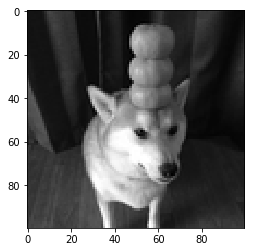

tensor([[ 1.3134, -3.7517]], grad_fn=<AddmmBackward>)
prediction  -  tensor(0)
alpha


In [4]:
some_scrapy_boi()

img_processor()

finalise_data()

train_main()

classifier()
